In [0]:
import numpy as np
import sklearn
import torch
import scipy
from matplotlib import pylab as plt
import torch
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
N_SAMPLES  = 50
def simple_data_generator(size, random_state=None):
    np.random.seed(random_state)
    return np.random.random(size=(size, 2))

#density_square = [(x1, x2, y1, y2), (...), ...] - coordinates of square with assigned dencity (dencity * size)
def data_generator(size = N_SAMPLES, density_square=[(0, 0.2, 0, 1)], density=[0.5], random_state=None):
    np.random.seed(random_state)
    gen_data_size = 0
    data=np.array([]).reshape(0,2)
    for d, square in zip(density, density_square):
        if(d > 1):
            print("density must be float in range [0, 1]:", density)
            return
        
        size_i=int(size * d)
        x_data_i = np.random.random(size=(size_i, 1)) * (square[1] - square[0]) + square[0]
        y_data_i = np.random.random(size=(size_i, 1)) * (square[3] - square[2]) + square[2]
        data = np.vstack((data, hstack((x_data_i, y_data_i))))
        #print(data)
        gen_data_size += size_i
    if gen_data_size < size:
        data = np.vstack((data, np.random.random(size=(size-gen_data_size, 2))))
    return data

random_state=20
test_datasets_lite = [
    data_generator(50, density=[0.7]),
    data_generator(50, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(50, [(0, 1, 0, 0.2)], [1]),
    data_generator(50, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(50, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(50, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(50, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

test_datasets_medium = [
    data_generator(200, density=[0.7], random_state=random_state),
    data_generator(200, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(200, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(200, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

test_datasets_hard = [
    data_generator(500, density=[0.7], random_state=random_state + 1),
    data_generator(500, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 1, 0, 0.2)], [1], random_state=random_state + 1),
    data_generator(500, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state + 1),
]

test_datasets_pro = [
    data_generator(5000, density=[0.7]),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(5000, [(0, 1, 0, 0.2)], [1]),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

np.random.seed(random_state)
test_datasets_monster = [
    np.random.random(size=(5000, 2)),
    data_generator(5000, density=[0.7], random_state=random_state),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

(200, 1) (30, 1)


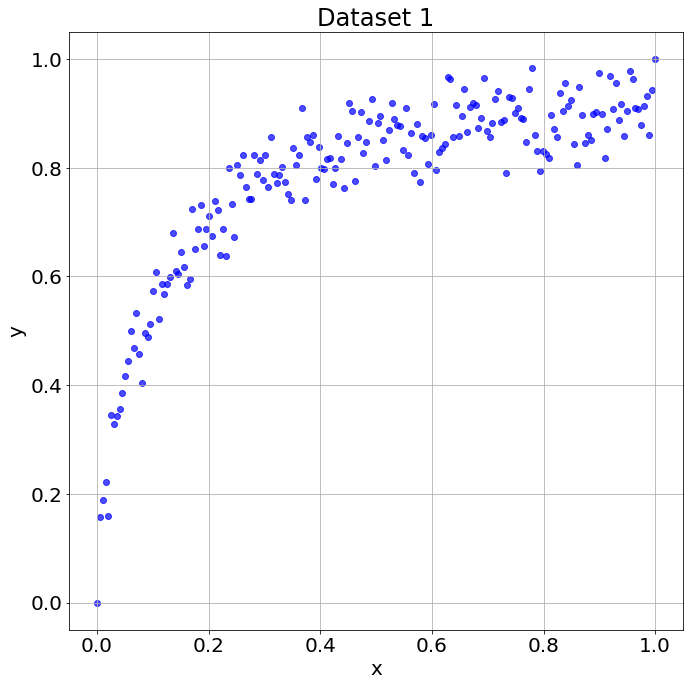

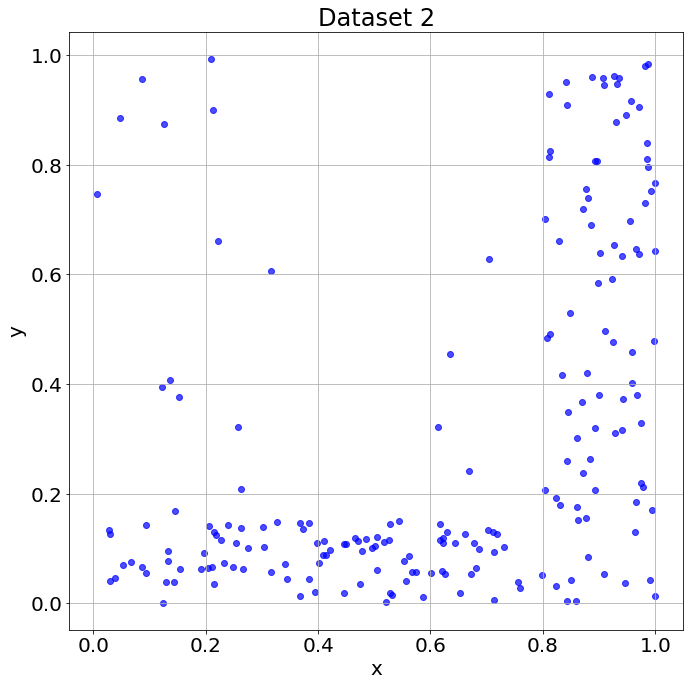

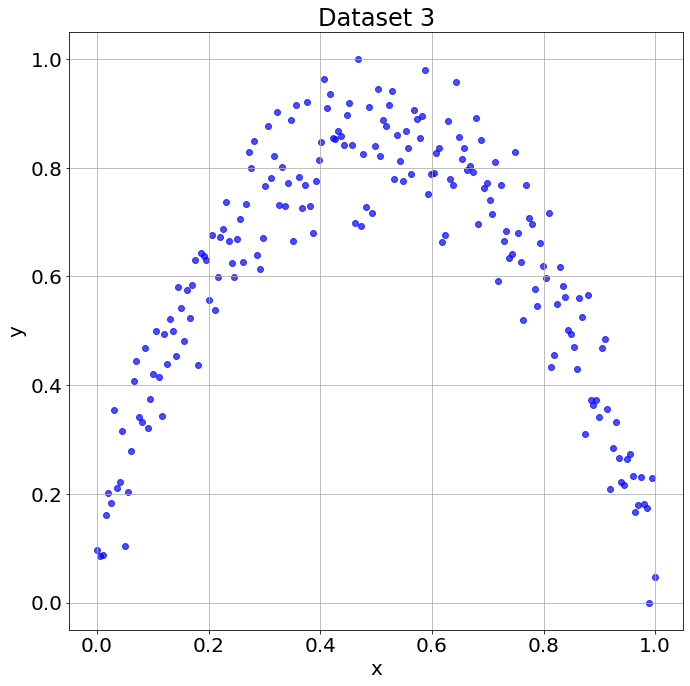

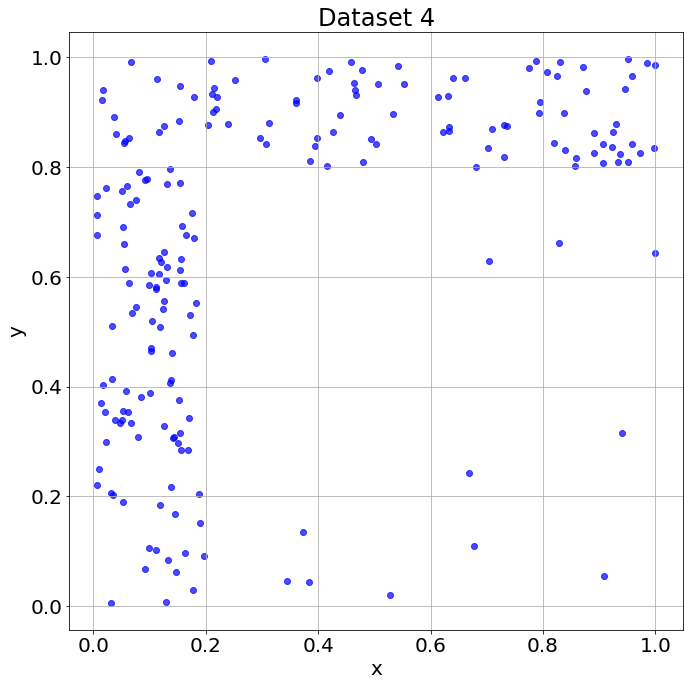

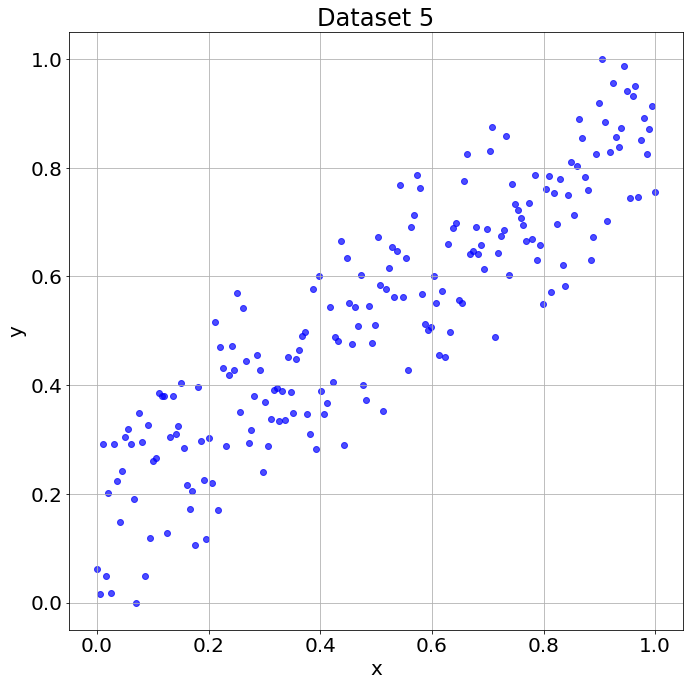

In [0]:
from scipy import stats
PRETTY_DATASETS_CUP = 200
x = np.linspace(0, 8, PRETTY_DATASETS_CUP).reshape(-1, 1)

np.random.seed(20)
noise0 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(26)
noise1 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(30)
noise2 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(36)
noise3 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(40)
noise4 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3
np.random.seed(46)
noise5 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3


chi2_y = stats.chi2(df=1).cdf(x) + noise0 - noise1
chi2_y = (chi2_y - np.min(chi2_y)) / (np.max(chi2_y) - np.min(chi2_y))

parab = -4 * (x/8 -  0.5)**2 + 1 + noise2 - noise3
parab = (parab - np.min(parab)) / (np.max(parab) - np.min(parab))

print(x.shape, np.random.random(size=(30, 1)).shape)
linear = x / 8 + noise4 - noise5
linear = (linear - np.min(linear)) / (np.max(linear) - np.min(linear))

np.random.seed(20)
Pretty_datasets = [
    np.hstack((x / 8, chi2_y)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.8, 0, 0.15), (0.8, 1, 0, 1)], density=[0.45, 0.38], random_state=random_state),
    np.hstack((x / 8, parab)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    np.hstack((x / 8, linear))
]

matplotlib.rcParams.update({'font.size': 20})
for i, data in enumerate(Pretty_datasets):
    plt.figure(figsize=[11,11])
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, c="blue")
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.xlim(0, 1.)
    #plt.ylim(0, 1.)
    plt.grid(True)
    plt.title("Dataset " + str(i + 1))
    plt.show()

In [0]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    matplotlib.rcParams.update({'font.size': 22})
    y_pred = [predict(x_i) for x_i in x]
    loss = np.sum(np.abs(y - y_pred))
    lin_loss = np.sum(np.abs(y - x))
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[14,14])
    plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
    x_approx = np.linspace(0, 1, 101)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(name + " approximation")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid(True)
    plt.legend(loc='best')
    #plt.show()

In [0]:
import time
matplotlib.rcParams.update({'font.size': 16})
def RunTests(estimator, dataset, name=""):
    for i, data in enumerate(dataset):
        print("Dataset", i, ":")
        start_time = time.time()
        losses = estimator.fit(data[:, 0], data[:, 1])
        print("Fitting time:", (time.time() - start_time) / 60, "min")
        print("alpha, beta:", estimator.alpha, estimator.beta)
        ApproxPlot(data[:, 0], data[:, 1], estimator.PredictProba, name)
        plt.savefig(name + "Plot" + str(i))
        plt.show()
        plt.figure(figsize=[9,9])
        plt.plot(np.arange(1, len(losses) + 1), losses, c='blue')
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("L1 discrepancy")
        plt.legend(loc="best")
        plt.grid(True)
        plt.savefig(name + "Losses" + str(i))
        plt.show()

In [0]:
def DBeta__(alpha, beta, x):
    return (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

def Beta(alpha, beta, x, N=100):
    if x == 0:
        return x 
    
    res1 = torch.tensor(0,     dtype = float)
    res2 = torch.tensor(0,     dtype = float)
    step = torch.tensor(1 / N, dtype = float)
    i = 0
    last = x
    
    while step * i + step / 2 < last:
        res1 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
        
    res2 = res1.clone()
    while step * i + step / 2 < 1:
        res2 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
    
    return res1 / res2

In [0]:
torch.cuda.is_available()

True

In [0]:
REG=0
SMALL_CONST = 1e-16
class BetaRegression:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y, reg=REG):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i]) + reg * ((self.alpha - 1) ** 2 + (self.beta - 1) ** 2)
        return loss
    
    def PredictProba(self, x):
        return Beta(self.alpha, self.beta, x)
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0] + 2, dtype=float) 
        #self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0] + 2, dtype=float)
        #self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=200, lr=0.1, reg=REG, random_state=None):
        self.InitParams(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.best_alpha = self.alpha.item()
        self.best_beta  = self.beta.item()
        self.best_loss  = len(y)
        self.best_ep    = 1


        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False)#, device=device)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False)#, device=device)
        loss = []
        
        optimizer = torch.optim.Adam([self.alpha, self.beta], lr=lr)
        
        self.InitAB = [self.alpha.item(), self.beta.item()]
        
        for ep in np.arange(num_epochs):
            
            loss_i = self.LossFunc(x, y, reg)
            if loss_i < self.best_loss:
                self.best_loss = loss_i.item()
                self.best_alpha = self.alpha.item()
                self.best_beta  = self.beta.item()
                self.best_ep    = ep
            loss_i.backward()
            optimizer.step()
            
            #if self.alpha.data < 0:
            #    self.alpha.data = torch.tensor(SMALL_CONST, dtype=float)
            #if self.beta.data < 0:
            #    self.beta.data = torch.tensor(SMALL_CONST, dtype=float)
            
            optimizer.zero_grad()
            
            loss.append(loss_i.data.item())

        self.loss = loss
        self.alpha = self.best_alpha
        self.beta = self.best_beta
        return loss


CPU times: user 5min 38s, sys: 2.96 s, total: 5min 41s
Wall time: 5min 41s


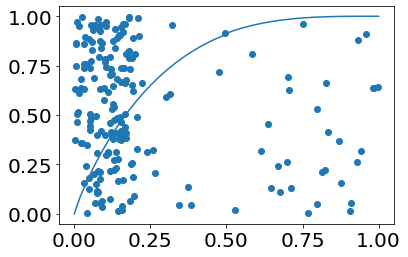

tensor(0.9956, dtype=torch.float64)
[101.05755266059904, 100.95448515167215, 100.8481924432129, 100.73863470261269, 100.62598560434498, 100.50984261504068, 100.39009849692806, 100.26664228589713, 100.13935894709735, 100.00812927447326, 99.87282988292269, 99.73333323856427, 99.59092994985784, 99.44958563913593, 99.30399737217417, 99.15398461592547, 98.99936991913273, 98.83997733152144, 98.67563125980921, 98.50779499055898, 98.33527695775321, 98.15744527564875, 97.97411069216787, 97.78508329277524, 97.59017200526536, 97.38918419387457, 97.18192532225038, 96.96819867013762, 96.75163950522284, 96.52863476294633, 96.29889367155303, 96.06219104969037, 95.81830116851145, 95.56699732628194, 95.31224545786208, 95.05328656253356, 94.7868124159535, 94.51255063511925, 94.23338582312654, 93.94870546165579, 93.65977359054116, 93.37119236724737, 93.07794943368934, 92.78153270991253, 92.47733028746012, 92.17795490649515, 91.88071123259502, 91.5828596034203, 91.27790196060457, 90.96538009975276, 90.644

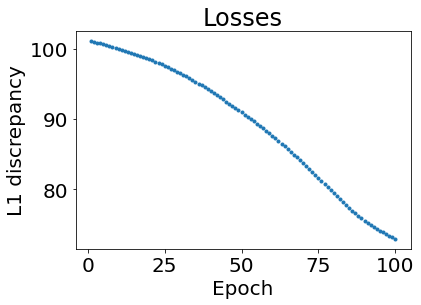

In [0]:
# LR = 0.01, ab+1, ep=400

br = BetaRegression()
data = test_datasets_medium[0] #data_generator(100, density_square=[(0.2, 0.8, 0., 0.2), (0.8, 1, 0, 1)], density=[0.45, 0.45])
#data = torch.from_numpy(data).float().to(device)
%time loss = br.fit(data[:, 0], data[:, 1], lr=0.01, num_epochs=100)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(torch.tensor(np.linspace(0, 1, 100)), [br.PredictProba(torch.tensor(x_i)) for x_i in np.linspace(0, 1, 100)])
plt.show()
print(br.PredictProba(0.8))
print(loss)
print("alpha, beta:", br.alpha, br.beta)


plt.scatter(np.arange(1, len(loss) + 1), loss, marker='.')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("L1 discrepancy")
plt.show()
#plt.scatter(data[:, 0], data[:, 1])
#plt.plot(torch.tensor(np.linspace(0.01, 1, 100)), Beta(np.linspace(0.01, 1, 100)))
#plt.show()

CPU times: user 4min 28s, sys: 3.93 s, total: 4min 32s
Wall time: 4min 32s


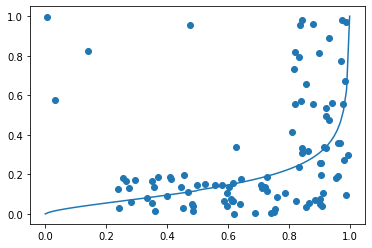

tensor(0.2248, dtype=torch.float64)
[47.40646718055576, 43.80245818232959, 40.100426210861805, 36.475407555494776, 33.05317417174882, 29.77089123762112, 26.918509754882077, 24.356820119843203, 22.38012345132497, 20.93153697327859, 20.278805309414796, 20.143077049240915, 20.388237645784955, 20.979325106990665, 21.45430935770378, 21.88865493448564, 22.211158429134798, 22.424124031841057, 22.521882394296526, 22.5231936321446, 22.438133560492865, 22.273112279139777, 22.049406907923867, 21.787590012862257, 21.4701379911276, 21.184029019676966, 20.864955395919775, 20.5539291998203, 20.372813809678867, 20.31138577449741, 20.289780032943355, 20.332876861761978, 20.388658880671755, 20.456220842304063, 20.549014631947074, 20.624615359987857, 20.67449084396883, 20.67780621053064, 20.638574150646576, 20.570936912272163, 20.49561471593121, 20.426420985452747, 20.38083060000949, 20.34406581984245, 20.3076556967726, 20.280243534393815, 20.279979457496058, 20.28457666573094, 20.29208646221744, 20.3007

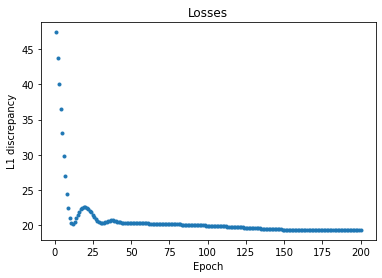

In [0]:
# LR = 0.1, ab+1, ep=200

br = BetaRegression()
data = data_generator(100, density_square=[(0.2, 0.8, 0., 0.2), (0.8, 1, 0, 1)], density=[0.45, 0.45])
#data = torch.from_numpy(data).float().to(device)
%time loss = br.fit(data[:, 0], data[:, 1], lr=0.1, num_epochs=200)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(torch.tensor(np.linspace(0, 1, 100)), [br.PredictProba(torch.tensor(x_i)) for x_i in np.linspace(0, 1, 100)])
plt.grid(True)
plt.show()
print(br.PredictProba(0.8))
print(loss)
print("alpha, beta:", br.alpha, br.beta)

plt.scatter(np.arange(1, len(loss) + 1), loss, marker='.')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("L1 discrepancy")
plt.grid(True)
plt.show()
#plt.scatter(data[:, 0], data[:, 1])
#plt.plot(torch.tensor(np.linspace(0.01, 1, 100)), Beta(np.linspace(0.01, 1, 100)))
#plt.show()

0.8794161180310729 3.2400474825640195
0.0 0.0
3.893368906759772e-10 3.1289167981034737e-10
1.0997433971877234e-08 5.04329545173663e-09
6.05621004039454e-08 2.572221923919431e-08
1.9783533491397993e-07 8.190708716793588e-08
4.923390805753629e-07 2.0148805163381028e-07
1.0351589755582513e-06 4.210098709742986e-07
1.939778456446774e-06 7.860103286566485e-07
3.3429557445429523e-06 1.3513762426714736e-06
5.405646434289592e-06 2.1817181928993776e-06
8.313974607999876e-06 3.351765180222462e-06
1.2280255624095509e-05 4.9467805247748936e-06
1.7544073968823423e-05 7.063000412737427e-06
2.4373419825940595e-05 9.808096612337801e-06
3.306588830735271e-05 1.330166500117961e-05
4.394994560264635e-05 1.767574167975491e-05
5.738626664963743e-05 2.3075348591195364e-05
7.376914930456817e-05 2.965907072632061e-05
9.352801040288931e-05 3.7599667167350185e-05
0.000117128969553551 4.7084718414939536e-05
0.00014507652700575767 5.831731265337223e-05
0.0001779153424721242 7.15167738399206e-05
0.0002162321223916

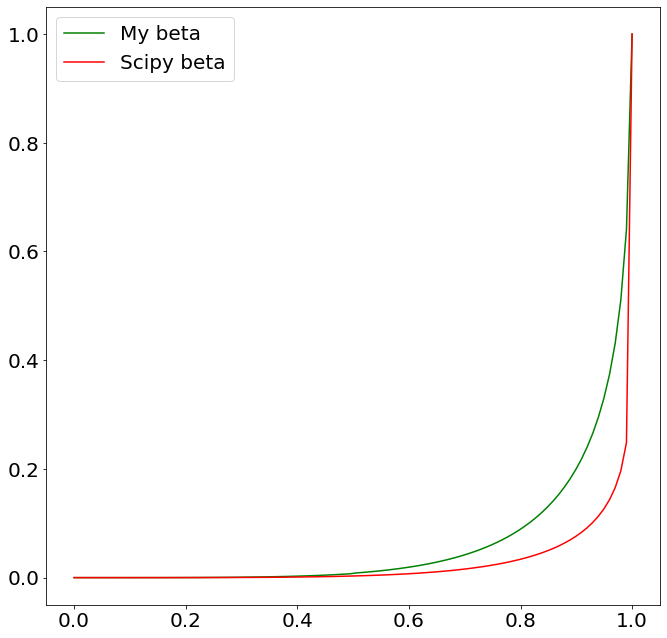

In [0]:
print(br.alpha, br.beta) #0.4903 0.6874
al = 4
be = 0.1
t = torch.tensor(np.linspace(0, 1, 100), dtype=float)
my  = []
sci = []

for t_i in t:
    my_i  = Beta(al, be, t_i, N=100)
    sci_i = scipy.stats.beta.cdf(t_i, al, be)
    print(my_i.item(), sci_i)
    if t_i != 0 and my_i < my[-1]:
        print("BAD x =", t_i)
    my.append(my_i)
    sci.append(sci_i)

plt.figure(figsize=(11, 11))
plt.plot(t, my, label="My beta", c="g")
plt.plot(t, sci, label="Scipy beta", c="r")
plt.grid(True)
plt.legend()
plt.show()

In [0]:
#import tensorflow as tf
#import tensorflow_probability as tfp
#from scipy import stats
#from tensorflow_probability.python import distributions
#bet = distributions.Beta(InitAB[0], InitAB[1])
#print("tfp.Beta.cdf =", bet.cdf(a))
#print("scipy beta.cdf = ", stats.beta.cdf(a, 0.2, 0.7))

In [0]:
#a = tf.constant(0.4, dtype=tf.float32)
#b = tf.constant(0.2, dtype=tf.float32)
#a = tf.constant([np.random.random(1)[0], np.random.random(1)[0]], dtype=tf.float32, name="ab")
#print(np.random.random(1)[0])
#x = [0.1, 0.2, 0.3, 0.4, 0.2, 0.1, 0.1, 0.1, 0.5, 0.6]
#x = 0.5
#from tensorflow_probability.python import distributions

#for _ in np.arange(10):
#    with tf.GradientTape() as g:
#        g.watch(a)
#        with tf.GradientTape() as gg:
#            gg.watch(b)
#            bet = distributions.Beta(a, b)
#            y = tf.constant(stats.beta.cdf(x, a, b)) #bet.cdf(x)
#            print("y =", y)
#            #mae_object = tf.keras.losses.MeanAbsoluteError()
#            #loss_func  = tf.reduce_mean(tf.abs(y - x))
#            #print("loss =", loss_func)
#            grad_a = g.gradient(y, a)
#            #grad_b = g.gradient(z, b)
#            print("grad_a = ", grad_a)
#            a -= grad_a
#            print(a)

In [0]:
#tfp.math.value_and_gradient(beta_func, (0.5, 0.4))

lr = 0.01, ab + 1, ep=400

Dataset 0 :
Fitting time: 23.474276697635652 min
loss = 49.97009155363361
liear function loss = 76.16415786061782

Dataset 1 :
Fitting time: 24.411946868896486 min
 loss = 30.004120218999503
liear function loss = 50.578457674939

Dataset 2 :
Fitting time: 25.424456791083017 min
 loss = 18.390726386482662
liear function loss = 87.74148133642495

Dataset 3 :
Fitting time: 26.036986986796062 min
 loss = 39.933901135659596
liear function loss = 70.82396481892815

Dataset 4 :
Fitting time: 25.198460121949513 min
 loss = 14.44710785686052
liear function loss = 73.32301494966183

Dataset 5 :
Fitting time: 23.98852652311325 min
 loss = 42.490734710171665
liear function loss = 73.00135709100901

Dataset 6 :
Fitting time: 24.973827306429545 min
 loss = 15.245658310545117
liear function loss = 15.227302706208327

lr = 0.1, ab+2, ep=200, 1e-16
Dataset 0 :
Fitting time: 11.569547776381174 min
alpha, beta: 1e-16 0.2979014635744606
Beta loss = 56.07112483395038
liear function loss = 85.0940017904783


Dataset 0 :
Fitting time: 10.457745909690857 min
alpha, beta: 0.08608806744169642 0.8368399565720291
Beta cumulative distribution function loss = 9.714105964181147
liear function loss = 58.22379342695287


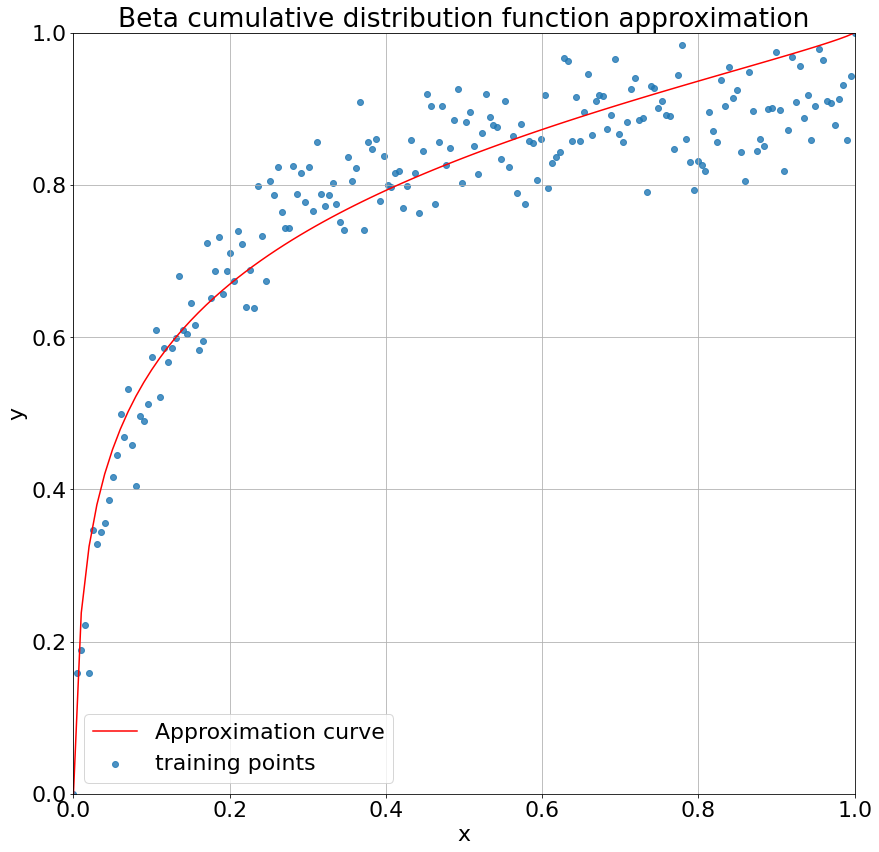

No handles with labels found to put in legend.


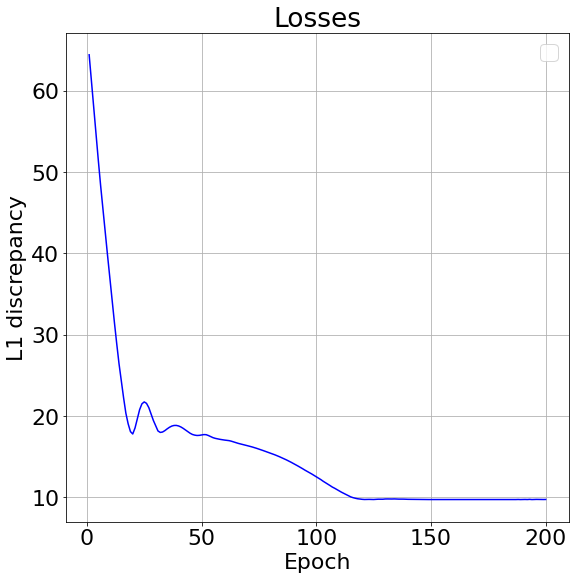

Dataset 1 :
Fitting time: 10.526153671741486 min
alpha, beta: 2.410715295909657 0.3426579111087421
Beta cumulative distribution function loss = 39.49766034501491
liear function loss = 74.32547498976234


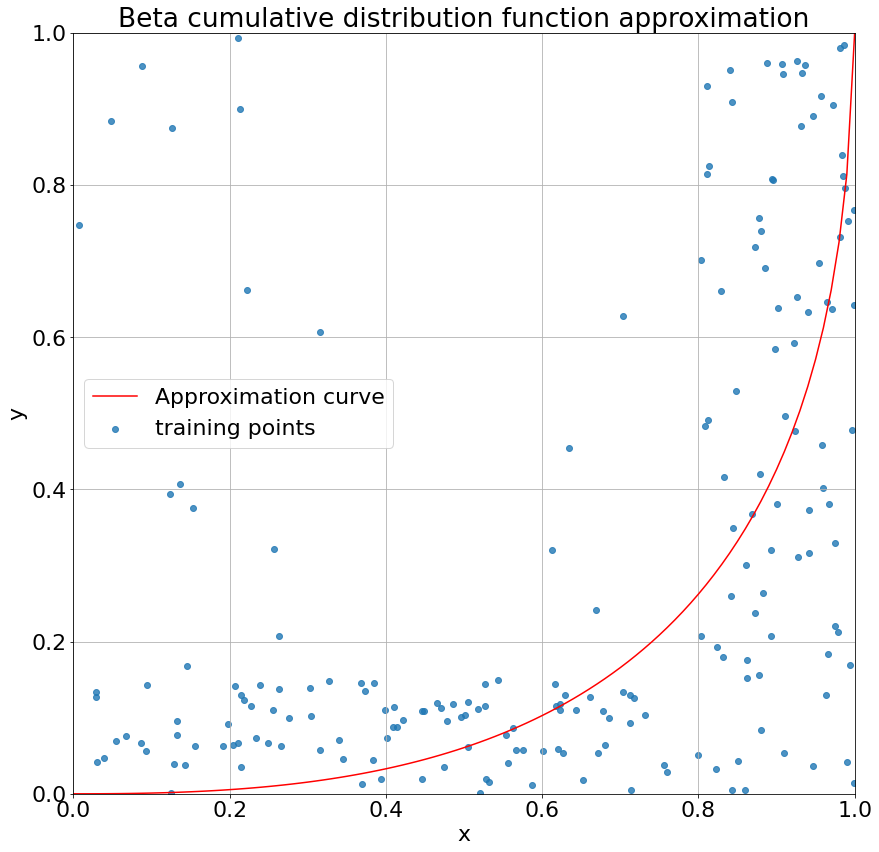

No handles with labels found to put in legend.


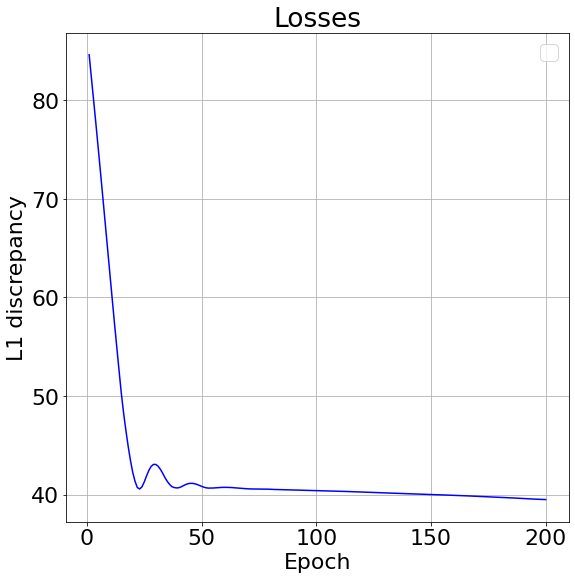

Dataset 2 :
Fitting time: 10.297443918387096 min
alpha, beta: -0.2768108200215454 -0.03807634312469666
Beta cumulative distribution function loss = 37.651957822721016
liear function loss = 69.73840848365876


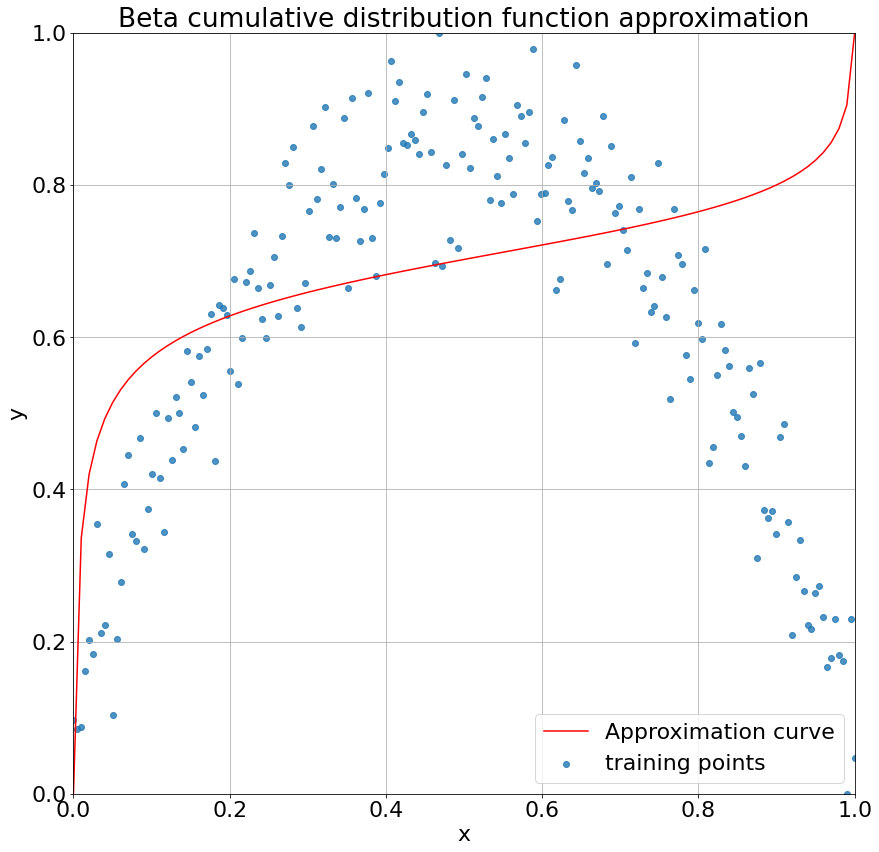

No handles with labels found to put in legend.


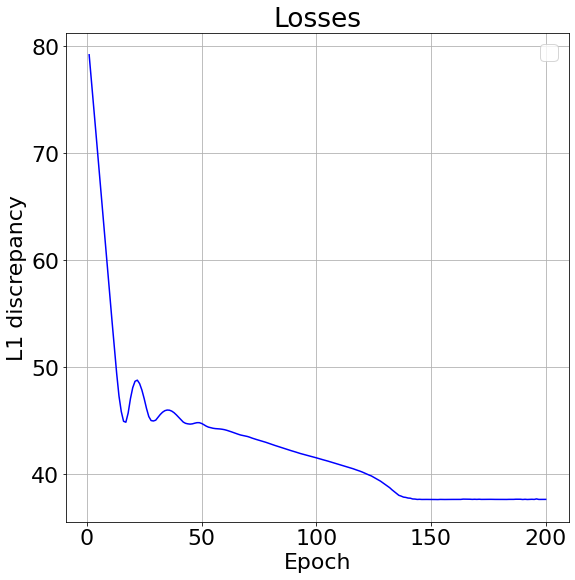

Dataset 3 :


In [0]:
# lr=0.1, ep=200, ab+2, 1e-20
bet_reg = BetaRegression()
RunTests(bet_reg, Pretty_datasets, "Beta cumulative distribution function")

Dataset 0 :
Fitting time: 2.809707442919413 min
alpha, beta: -0.7211906951831549 -0.7516987747810399
Beta_Pro loss = 12.683853469249028
liear function loss = 16.471415411910545


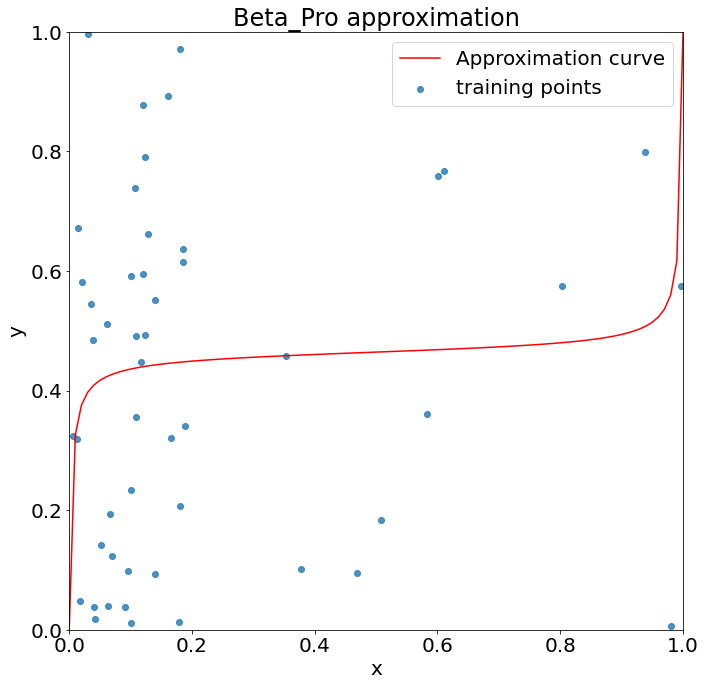

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


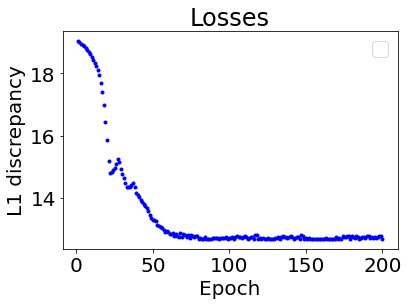

Dataset 1 :
Fitting time: 2.990771754582723 min
alpha, beta: 8.782580527690634 10.861311458441005
Beta_Pro loss = 5.368621715515258
liear function loss = 11.915344273968458


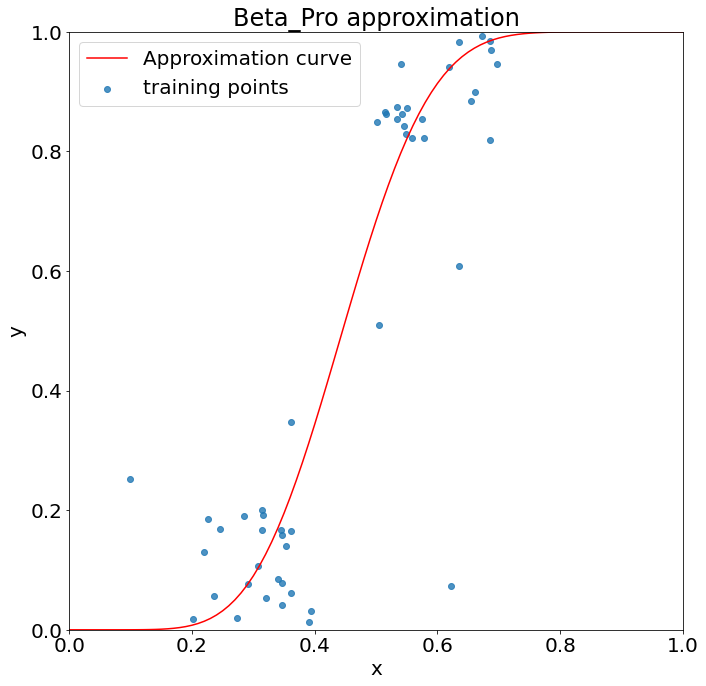

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


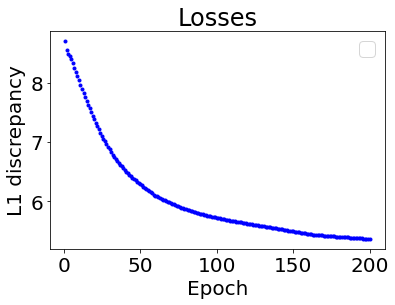

Dataset 2 :
Fitting time: 3.00257138411204 min
alpha, beta: 4.21356026184693 -0.007836063735713784
Beta_Pro loss = 4.056721720565422
liear function loss = 19.291437499137746


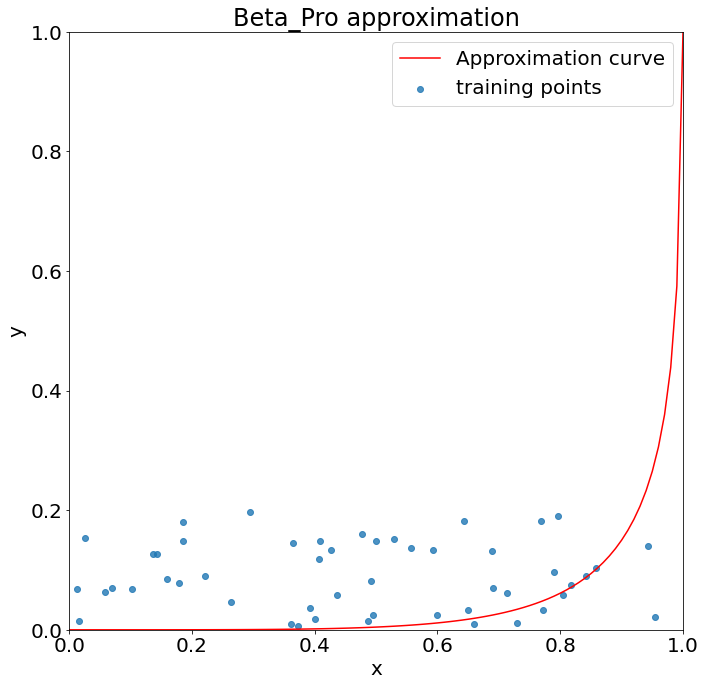

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


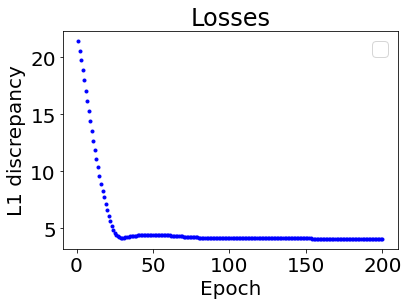

Dataset 3 :
Fitting time: 3.0887061754862466 min
alpha, beta: 1.2083131638723197 0.25575983388938445
Beta_Pro loss = 7.967223259379351
liear function loss = 15.814608663400971


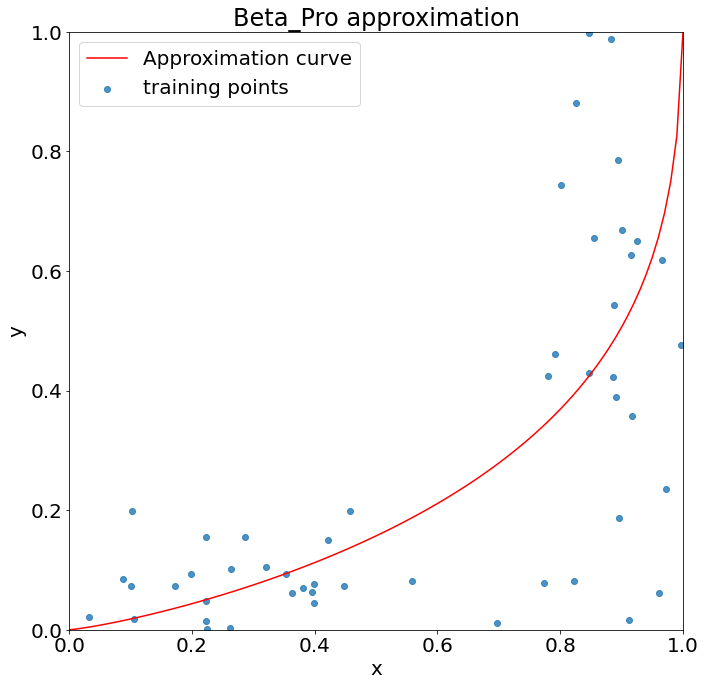

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


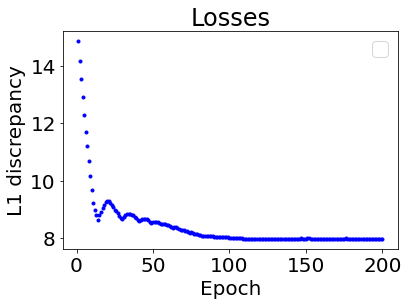

Dataset 4 :
Fitting time: 3.0317519704500833 min
alpha, beta: -1.080945047100065 -0.8749232712707964
Beta_Pro loss = 3.198199751086905
liear function loss = 18.89192036725644


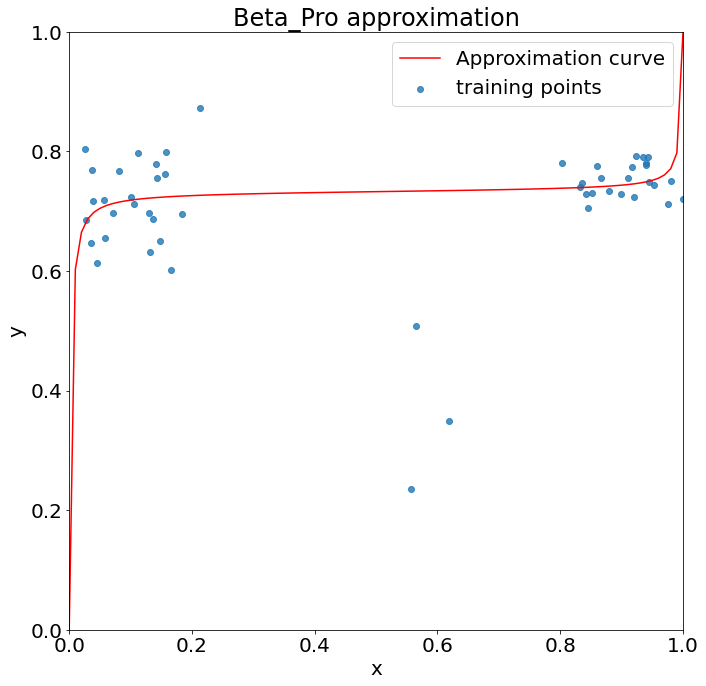

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


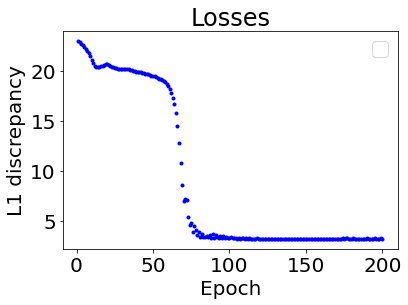

Dataset 5 :
Fitting time: 2.9094287514686585 min
alpha, beta: 0.3105935847995455 1.9471931574743602
Beta_Pro loss = 11.029990957902433
liear function loss = 17.110646990222246


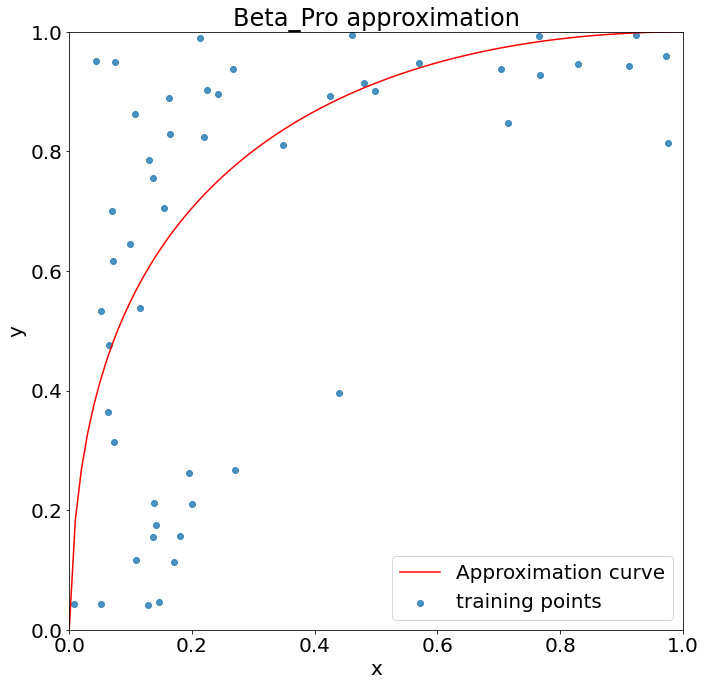

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


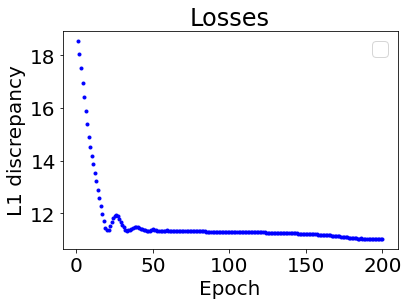

Dataset 6 :
Fitting time: 3.0536274751027426 min
alpha, beta: 0.9556999320022793 0.9448600639232262
Beta_Pro loss = 3.531223374688857
liear function loss = 3.5206172197147536


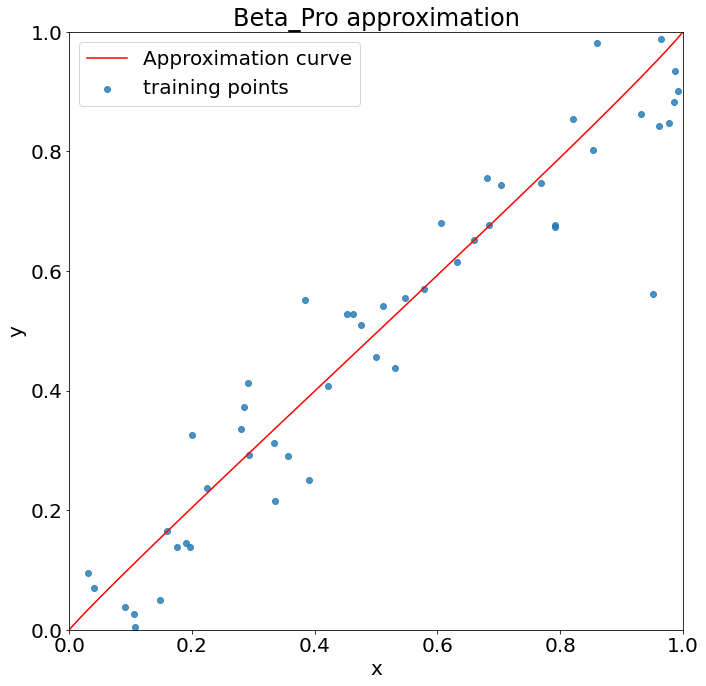

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


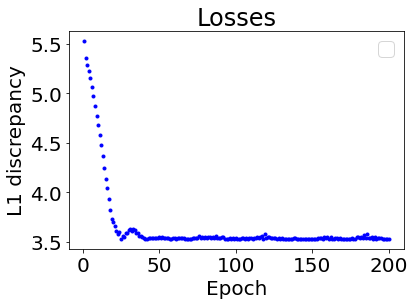

In [0]:
# lr=0.1, ep=200, ab+2, 1e-20
est = BetaRegression()
RunTests(est, test_datasets_lite  , "Beta_Pro")

In [0]:
from collections import deque
from functools import lru_cache

class GridSearch:
    def __init__(self):
        pass
    
    #HORIZONTAL = 0
    #SLOPE      = 1
    #VERTICAL   = 2
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            #print("pred =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            #print("k =", (self.nx / self.ny), ", b =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs((self.nx / self.ny) * (x[mask] - col / self.n_col) 
                                 + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        matplotlib.rcParams.update({'font.size': 28})
        x_approx = []
        y_approx = [0]
        for i in np.arange(self.nx + 1):
            x_approx.append(i / self.nx)
            x_approx.append(i / self.nx)
        for el in self.min_path:
            y_approx.append(math.floor(el / 2) / self.ny)
            y_approx.append(math.ceil (el / 2) / self.ny)
        y_approx.append(1)
        
        lin_loss = np.sum(np.abs(y - x))
        #print("LinGrid loss =", self.min_loss)
        #print("liear function loss =", lin_loss)
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker="o", label="training points")

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        plt.legend(loc='best')
        plt.title("Grid search approximation")
        plt.grid(True)
        plt.savefig("GridSearchPlot" + str(np.random.randint(1000)) + ".png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        #if row >= self.n_row: #Unnecessary?
        #    curr_stack.append(math.inf)  #for pop
        #    return math.inf, curr_stack
        
        if col == self.n_col:
            #curr_stack.append(math.inf)  #for pop
            return 0, curr_stack
            
        #print("(REC)")
        curr_min_loss = math.inf
        curr_jump     = 0
        #curr_stack.append(math.inf)  #for pop
        for vert_jump in np.arange(row, self.n_row - 1, 2):
            SlopeLoss, SlopeStack = self.GetLossRec(vert_jump + 2, col + 1)
            HorizLoss, HorizStack = self.GetLossRec(vert_jump, col + 1)
            SlopeStack = SlopeStack.copy()
            HorizStack = HorizStack.copy()
            SlopeLoss += self.grid_losses[vert_jump + 1, col]
            HorizLoss += self.grid_losses[vert_jump, col]
            
            
            if SlopeLoss < curr_min_loss and SlopeLoss < HorizLoss:
                curr_stack    = SlopeStack
                curr_min_loss = SlopeLoss
                curr_jump     = vert_jump + 1
            elif HorizLoss < curr_min_loss:
                curr_stack    = HorizStack.copy()
                curr_min_loss = HorizLoss
                curr_jump     = vert_jump
            
        #Last iteration
        self.rec_iter += self.n_col - col
        HorizLoss = np.sum(self.grid_losses[self.n_row - 1, col:]) #Vertical top line
        #print("HorizLoss =", HorizLoss)
        if HorizLoss < curr_min_loss:
            curr_min_loss = HorizLoss
            curr_jump = self.n_row - 1
            #Correcting path
            path_len = len(curr_stack)
            curr_stack.clear()
            curr_stack.extend([self.n_row - 1] * path_len)
         
        curr_stack.append(curr_jump)
        return curr_min_loss, curr_stack
        
    #@lru_cache(maxsize=None)
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx == 0 or ny == 0:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        #print(self.GetLossRec.cache_info())
        self.GetLossRec.cache_clear()
        #self.min_path.popleft()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        #print(self.grid_losses)
        #print(self.min_path)
        #self.min_path.pop()
        if rec == True:
            gr1 = GridSearch()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearch()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
        
        return self.min_loss, self.min_path
        
        

Excecution time = 6.749718848864237 min
6.226547617927651
nx, ny = 128 99


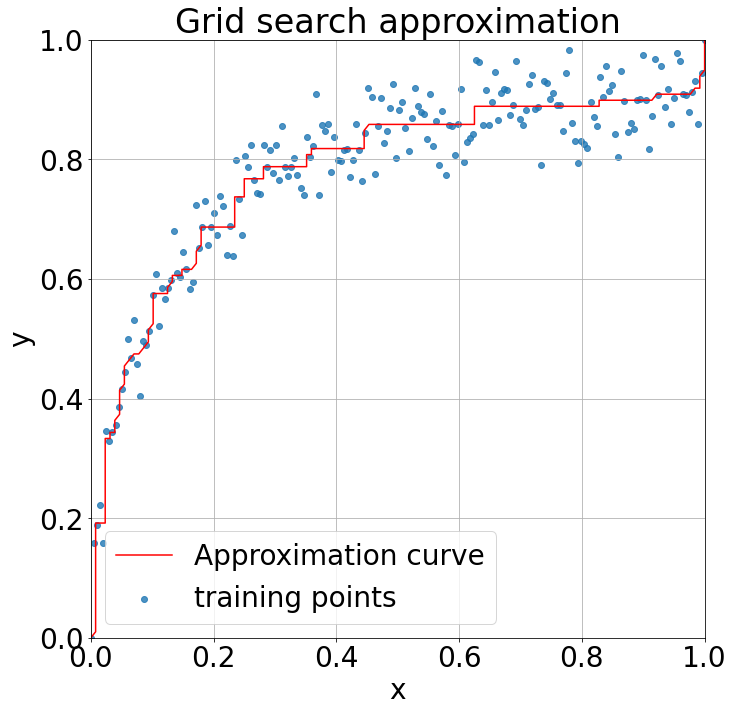

Excecution time = 6.4577871799469 min
33.038610276866855
nx, ny = 128 117


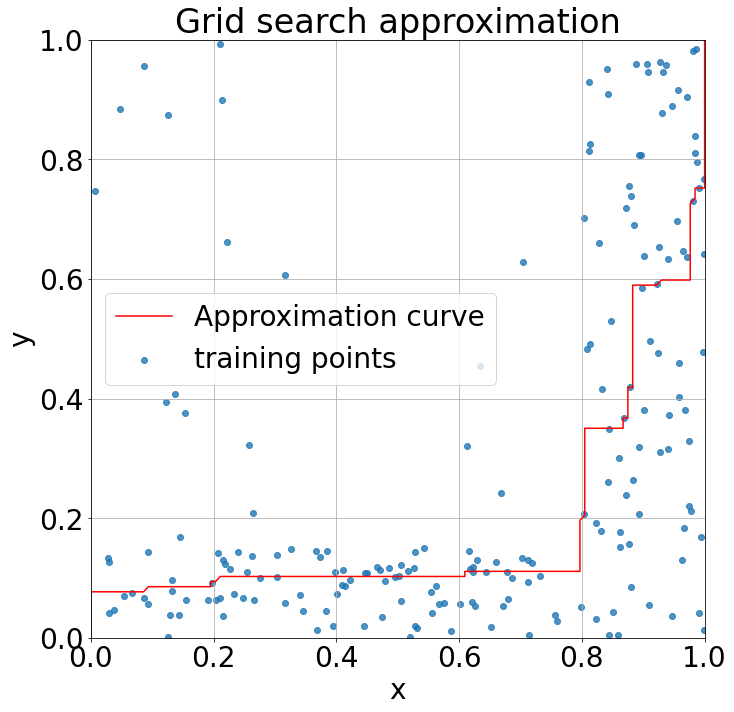

Excecution time = 6.577388751506805 min
26.46243924206083
nx, ny = 127 46


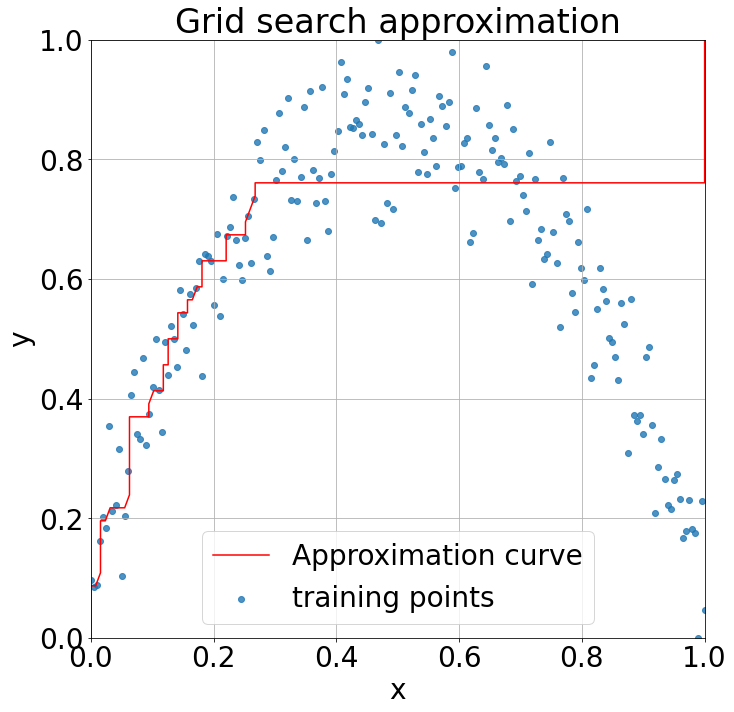

Excecution time = 6.57435218890508 min
34.28175206620246
nx, ny = 128 40


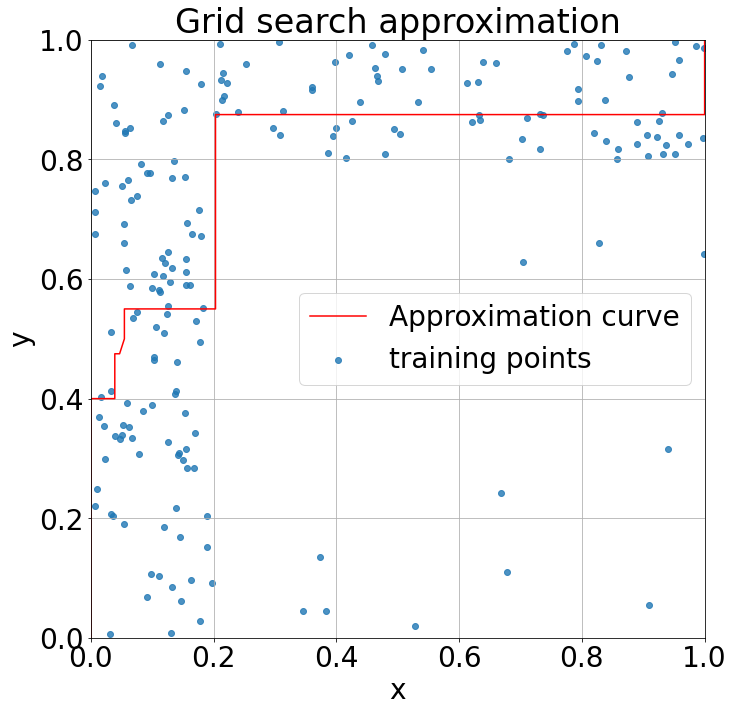

Excecution time = 6.596328282356263 min
14.20952770921806
nx, ny = 128 64


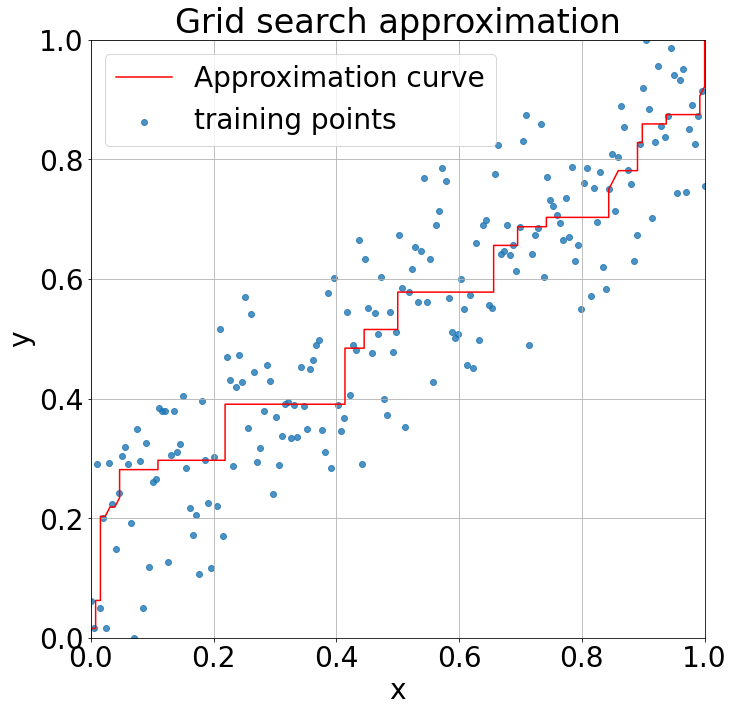

In [0]:
import time
for i, dataset in enumerate(Pretty_datasets):
    gs = GridSearch()
    start_time = time.time()
    lossg, path = gs.fit(dataset[:, 0], dataset[:, 1], nx=128, ny=128, rec=True) # 256, 256
    print("Excecution time =", (time.time() - start_time) / 60, "min")
    print(lossg)
    print("nx, ny =", gs.nx, gs.ny)
    gs.LinPlot(dataset[:, 0], dataset[:, 1])

In [0]:
#import logging
#import threading

class GridSearchOpt:
    def __init__(self):
        pass
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            #print("pred =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            #print("k =", (self.nx / self.ny), ", b =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs((self.nx / self.ny) * (x[mask] - col / self.n_col) 
                                 + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        matplotlib.rcParams.update({'font.size': 20})
        x_approx = []
        y_approx = [0]
        for i in np.arange(self.nx + 1):
            x_approx.append(i / self.nx)
            x_approx.append(i / self.nx)
        for el in self.min_path:
            y_approx.append(math.floor(el / 2) / self.ny)
            y_approx.append(math.ceil (el / 2) / self.ny)
        y_approx.append(1)
        
        lin_loss = np.sum(np.abs(y - x))
        print("LinGrid loss =", self.min_loss)
        print("liear function loss =", lin_loss)
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker=".", label="training points")

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1, label="Approximation curve")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        plt.grid(True)
        plt.legend(loc='best')
        plt.title("Grid search approximation")
        plt.savefig("GridSearchPlotNorm" + str(np.random.randint(1000)) + ".png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        #if row >= self.n_row: #Unnecessary?
        #    curr_stack.append(math.inf)  #for pop
        #    return math.inf, curr_stack
        
        if col == self.n_col or row == self.n_row:
            #curr_stack.append(math.inf)  #for pop
            return 0, curr_stack
        
        if row == self.n_row - 1:
            curr_stack.extend([self.n_row - 1] * (self.n_col - col))
            return np.sum(self.grid_losses[row, col:]), curr_stack
        
            
        #print("(REC)")
        #curr_min_loss = math.inf
        #curr_jump     = 0
        #curr_stack.append(math.inf)  #for pop
        self.grid_losses[row + 1, col]
        curr_min_loss, curr_stack = self.GetLossRec(row + 2, col + 1)
        curr_min_loss += self.grid_losses[row + 1, col]
        curr_row  = row + 1
        if(math.floor((self.n_row - row) / 2) < self.n_col - col):
            #print("HERE:", math.floor((self.n_row - row) / 2), self.n_col - col)
            HorizLoss, HorizStack = self.GetLossRec(row, col + 1)
            HorizLoss += self.grid_losses[row, col]
            if HorizLoss < curr_min_loss:
                curr_min_loss = HorizLoss
                curr_stack    = HorizStack
                curr_row      = row 
        curr_stack = curr_stack.copy()
        curr_stack.append(curr_row)
            
            
        #curr_jump     = vert_jump
            
        #Last iteration
        #self.rec_iter += 1
        #HorizLoss = np.sum(self.grid_losses[self.n_row - 1, col:]) #Vertical top line
        #print("HorizLoss =", HorizLoss)
        #if HorizLoss < curr_min_loss:
        #    curr_min_loss = HorizLoss
        #    curr_jump = self.n_row - 1
        #    #Correcting path
        #    path_len = len(curr_stack)
        #    curr_stack.clear()
        #    curr_stack.extend([self.n_row - 1] * path_len)
        #    self.arr[col] = self.n_row - 1
         
        return curr_min_loss, curr_stack
        
    
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0 or nx < ny:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.arr = np.zeros(self.n_col)
        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        #print(self.GetLossRec.cache_info())
        self.GetLossRec.cache_clear()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        #self.min_path.popleft()
        if rec == True:
            gr1 = GridSearchOpt()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearchOpt()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
        
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        #print(self.grid_losses)
        #print(self.min_path)
        return self.min_loss, self.min_path

Excecution time = 1.1561336517333984 min
loss = 7.325490483719278
nx, ny = 127 10
LinGrid loss = 7.325490483719278
liear function loss = 58.22379342695287


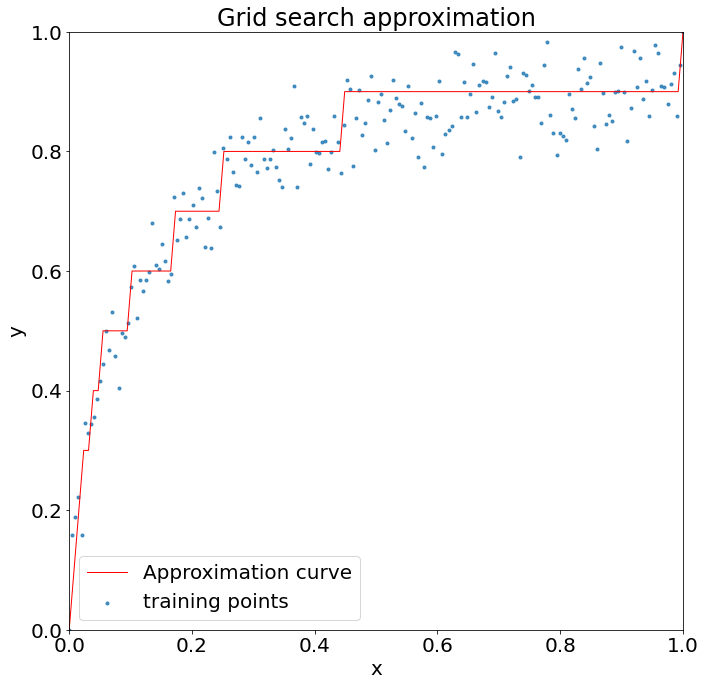

Excecution time = 1.1546409805615743 min
loss = 34.472317007340884
nx, ny = 127 10
LinGrid loss = 34.472317007340884
liear function loss = 74.32547498976234


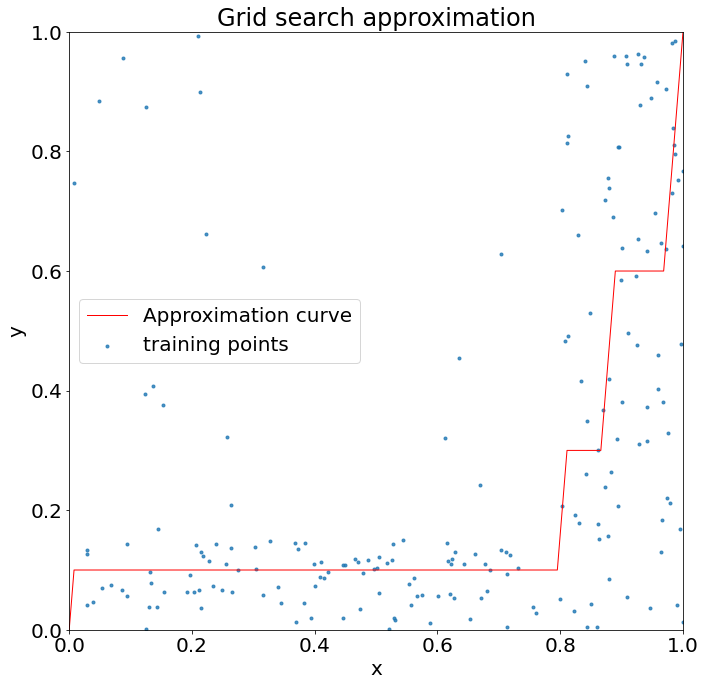

Excecution time = 1.1551470557848613 min
loss = 27.291508281101315
nx, ny = 127 9
LinGrid loss = 27.291508281101315
liear function loss = 69.73840848365876


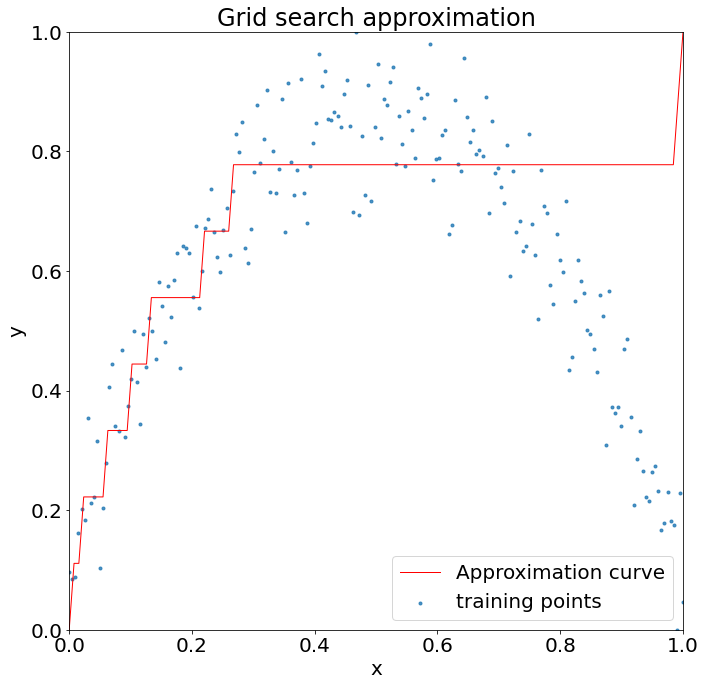

Excecution time = 1.135448936621348 min
loss = 35.82260368746947
nx, ny = 128 7
LinGrid loss = 35.82260368746947
liear function loss = 74.33146469085386


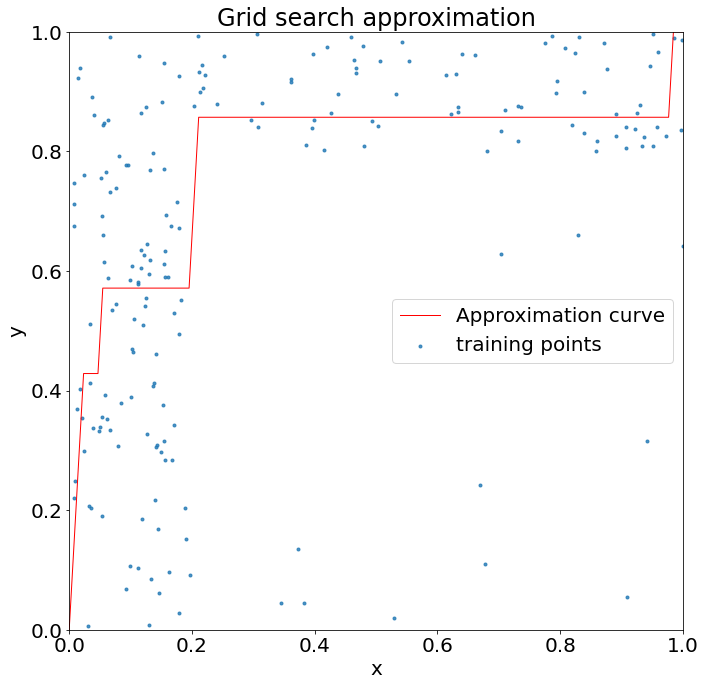

Excecution time = 1.1569455822308858 min
loss = 14.797369348660897
nx, ny = 127 20
LinGrid loss = 14.797369348660897
liear function loss = 21.78666536213388


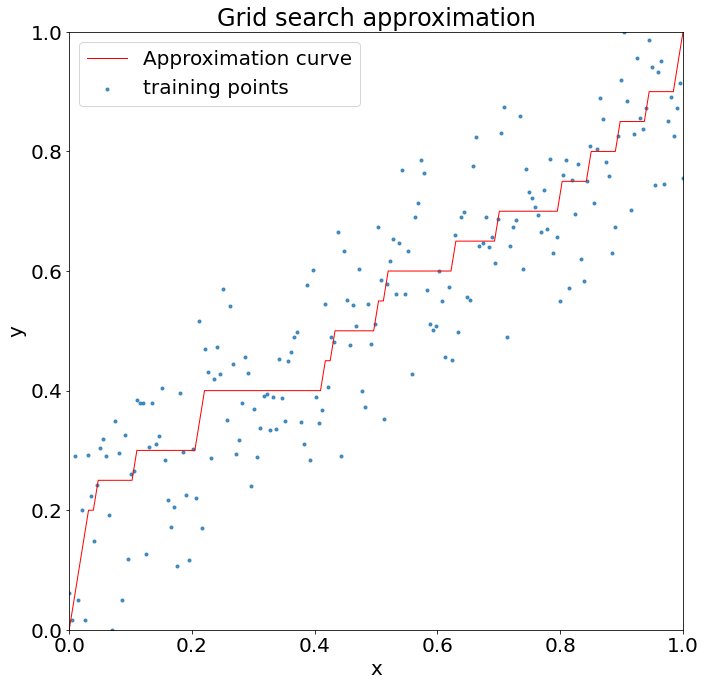

In [0]:
import time
for i, dataset in enumerate(Pretty_datasets):
    gso = GridSearchOpt()
    start_time = time.time()
    lossg, path = gso.fit(dataset[:, 0], dataset[:, 1], nx=128, ny=128, rec=True) # 256, 256
    print("Excecution time =", (time.time() - start_time) / 60, "min")
    print("loss =", lossg)
    print("nx, ny =", gso.nx, gso.ny)
    gso.LinPlot(dataset[:, 0], dataset[:, 1])